In [1]:
import pandas as pd
import numpy as np
%matplotlib nbagg
import matplotlib.pyplot as plt
import os

## 1 Yr Coincidences (from 1yr ago) (201812-201903)

In [2]:
def gaussian(x, amplitude, mean, stddev):
    """Plot gaussian dist according to parameters given"""
    return amplitude * np.exp(-((x - mean) / np.sqrt(2) / stddev)**2)

def plotPrep(arr,binnum=50):
    """Histogram data and output hist heights along with middle value for each bin"""
    vals, edges = np.histogram(arr,bins=binnum)
    binwidth = (edges[1]-edges[0])/2
    midbin = edges[:-1]+binwidth
    
    return vals, midbin

def gaussianFit(midbin,vals):
    """Fit gaussian distribution to given data and output values of dist at midbin points"""
    base = np.average(np.concatenate((vals[1:10],vals[-10:-1]))); adjvals = vals-base
    berr = np.std(np.concatenate((vals[1:10],vals[-10:-1])))/np.sqrt(len(np.concatenate((vals[1:10],vals[-10:-1]))))
    popt, pcov = optimize.curve_fit(gaussian, midbin, adjvals)
    gausvals = gaussian(midbin,*popt)+base
    argerr = np.sqrt(np.diag(pcov))/np.sqrt(sum(vals))
    print("Base:",base,"±",berr,"\nAmplitude:", popt[0],"±",argerr[0], "\nMean:", popt[1],"±",argerr[1],"\nStd. Dev:", popt[2],"±",argerr[2])
    return gausvals
def gaussianParams(midbin,vals):
    """Return only the gaussian fit parameters of the fit instead of the distribuition, along with error"""
    base = np.average(np.concatenate((vals[1:10],vals[-10:-1]))); adjvals = vals-base
    berr = np.std(np.concatenate((vals[1:10],vals[-10:-1])))/np.sqrt(len(np.concatenate((vals[1:10],vals[-10:-1]))))
    popt, pcov = optimize.curve_fit(gaussian, midbin, adjvals)
    argerr = np.sqrt(np.diag(pcov))/np.sqrt(sum(vals))
   
    print("Base %.4f ± %.4f\nAmplitude: %.4f ± %.4f\nMean: %.4f ± %.4f\nStd. Dev: %.4f ± %.4f" % (base,berr,popt[0],argerr[0],popt[1],argerr[1],popt[2],argerr[2]))
    return np.array([[base,berr],[popt[0],argerr[0]],[popt[1],argerr[1]],[popt[2],argerr[2]]])

In [3]:
#Sort coincidence data into pocam flash data and dark runs
#since the arrays are different widths
poco = []; darco = []
for f in os.listdir('../Data_backup/oldPocam/coincidences/'): #SUMMMER_STUDENTS/mens/oldPocam/
    d = np.loadtxt('../Data_backup/oldPocam/coincidences/'+f,delimiter="\t")
    if len(np.shape(d))==2:
        if np.shape(d)[1]!=9:
            darco += list(d)
        else: poco += list(d)
    elif len(np.shape(d))==1:
        if np.shape(d)[0]!=9:
            darco.append(d)
        else: poco.append(d)
    else:
        print(np.shape(d))
        
print(np.shape(poco),np.shape(darco))

(76008, 9) (29, 6)


In [4]:
poco[0]

array([-8.60000038e+00,  8.60000038e+00,  2.01900000e+03,  3.00000000e+00,
        1.50000000e+01,  2.00000000e+00,  2.00000000e+00,  1.20000000e+01,
        2.00000000e+00])

In [5]:
num_s=0
for f in os.listdir('../Data_backup/oldPocam/ms/'): #SUMMER_STUDENTS/mens/oldPocam/
    mss = np.loadtxt('../Data_backup/oldPocam/ms/'+f)
    num_s+=min(mss)
print(num_s)

2899851.0


<IPython.core.display.Javascript object>


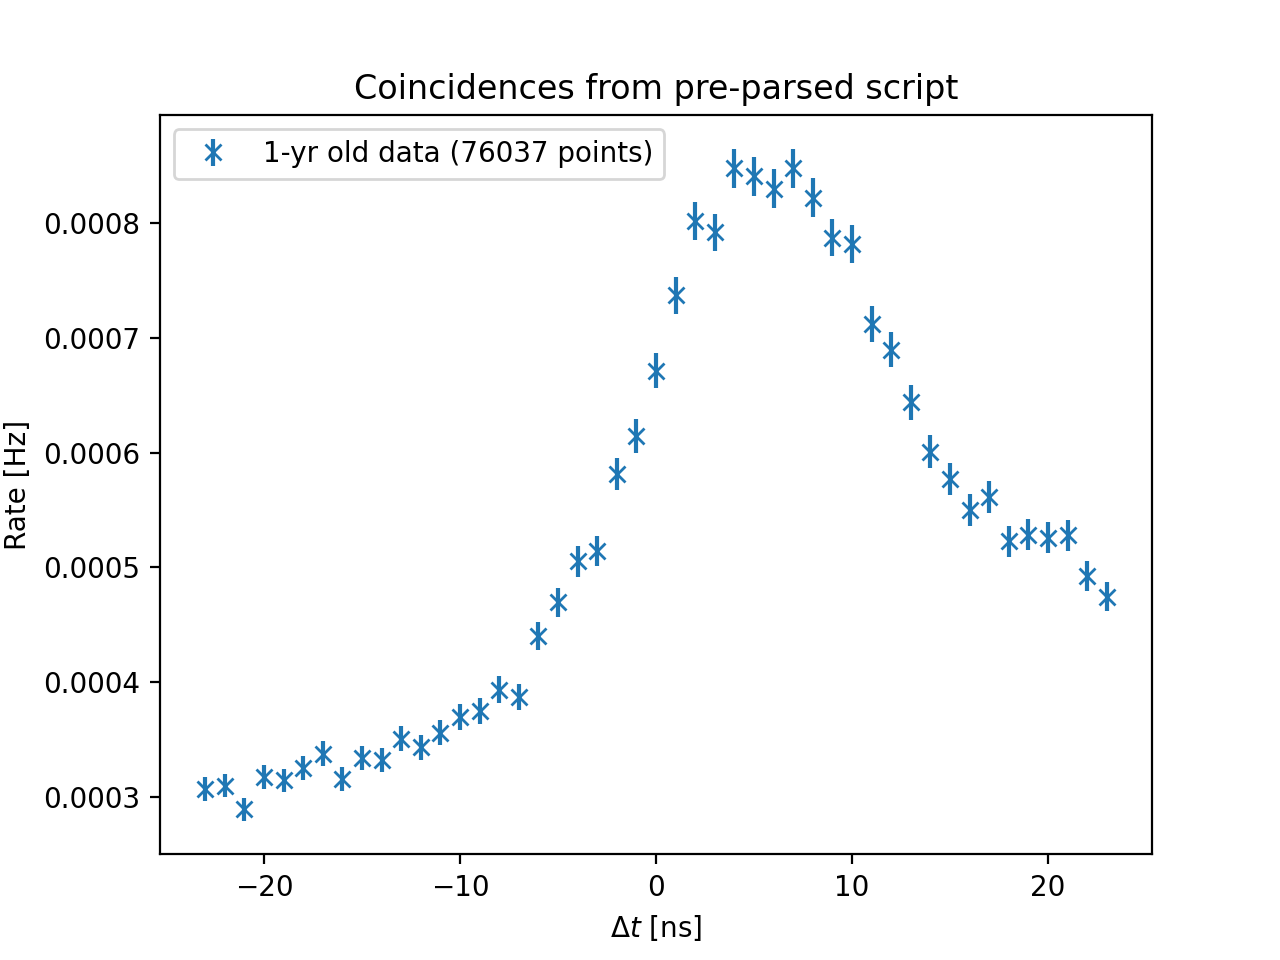

In [6]:
#plot
allco = list(np.array(poco).T[0])+list(np.array(darco).T[0])
bi=np.arange(-24.5,25,1)
plot=plotPrep(allco,binnum=bi)
plt.close()
plt.figure()
plt.errorbar(plot[1][1:-1],plot[0][1:-1]/num_s,yerr=np.sqrt(plot[0][1:-1])/num_s,fmt='x',label="1-yr old data ("+str(len(allco))+" points)",color="C0")
plt.legend(loc=0)
plt.xlabel(r'$\Delta t$ [ns]')
plt.ylabel('Rate [Hz]')
plt.title("Coincidences from pre-parsed script")
plt.show()

# 6-month old data (201907-201911)

In [ ]:
#couldn't get it to complete on illume yet but if it finished it would be 
#in /data/p-one/mens/oldPocam/coincFiles and /data/p-one/mens/oldPocam/msCounts